# Proyek UAS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UAS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [1]:
#loading data yang akan diolah
from google.colab import files
uploaded = files.upload()

Saving paris_housing2000.csv to paris_housing2000.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
paris = pd.read_csv('paris_housing2000.csv')
df_paris = pd.DataFrame(paris)
df_paris.head(20)

cityPartRange  numPrevOwners  made isNewBuilt hasStormProtector  basement  \
0               3              4  1995          N                 Y      3114   
1               9              1  2011          N                 Y      9390   
2               1              4  2003          Y                 N      2239   
3               6              2  1990          N                 N      6861   
4               6              9  1992          Y                 Y      6618   
5               5              2  2010          Y                 N      4426   
6               4              3  1990          Y                 N      6022   
7               6              3  2000          N                 N      2325   
8               2              2  2020          N                 Y      8598   
9               7              6  1995          N                 Y      2675   
10              5              1  2021          N                 Y      6831   
11              3              1  2002          N                 Y      7704   
12              5              4  1997          Y                 N      3411   
13              5              1  1991          N                 Y       411   
14              8              6  2014          Y                 N      2663   
15              7              5  2009          N                 Y      3367   
16              7              2  2019          N                 N      9680   
17              2              1  2014          Y                 N      1820   
18              6              5  2000          Y                 N      6453   
19              2              4  1996          Y                 Y      5740   

    attic  garage hasStorageRoom  hasGuestRoom    price category  
0    1258     264              Y             9  10313.5    Basic  
1    6219     922              N             9  13229.1    Basic  
2    2795     951              Y             7  14431.3    Basic  
3    5769     442              N             5  15488.0    Basic  
4    7045     939              Y            10  16799.2    Basic  
5    5336     911              N             4  17071.0    Basic  
6    8521     391              Y             3  17363.0    Basic  
7    6230     536              N             9  18985.0    Basic  
8    3119     268              N            10  19638.0    Basic  
9    6452     724              Y             2  19788.5    Basic  
10   1323     242              N             9  21201.1    Basic  
11   7896     468              Y             8  22499.2    Basic  
12   8985     213              N             4  22670.7    Basic  
13    475     110              N             9  23653.1    Basic  
14   1650     403              Y            10  23818.4    Basic  
15   1039     436              Y             1  24058.9    Basic  
16   5250     134              N            10  26533.9    Basic  
17    999     805              Y             4  27438.4    Basic  
18   5671     744              Y             9  28028.0    Basic  
19   8505     106              Y             6  28295.6    Basic

In [3]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_value = df_paris.isnull().sum().sort_values(ascending = False)
miss_value[miss_value>0]

Series([], dtype: int64)

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?


    untuk sub B:
    1. Bagaimana perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)
    2. Bagaimana komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic?


<Axes: xlabel='attic'>

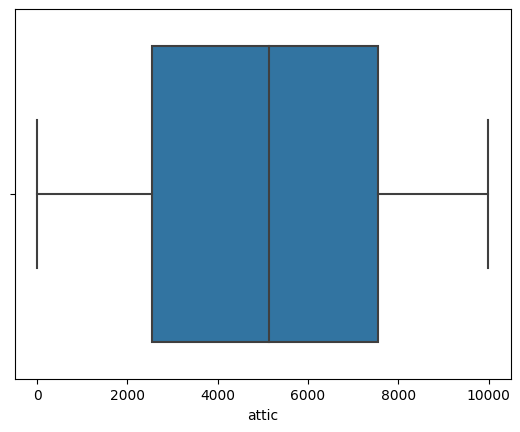

In [4]:
sns.boxplot(data=df_paris, x = 'attic')

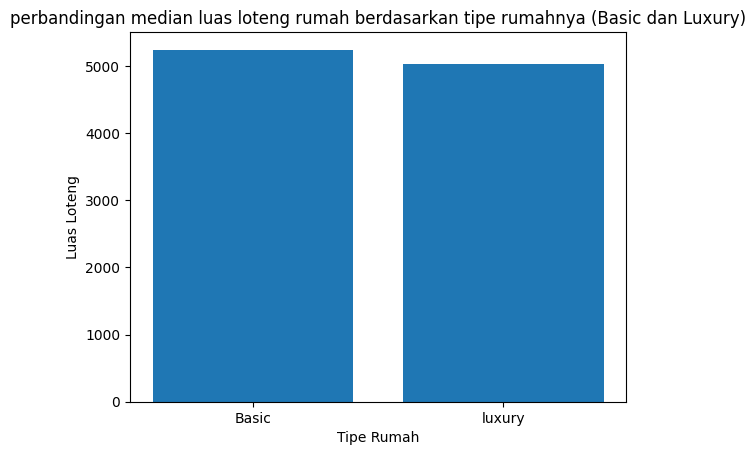

tipe rumah Basic:  1000
tipe rumah luxury:  1000
median luas loteng basic:  5243.0
median luas loteng luxury:  5023.0


In [5]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
basic= df_paris[df_paris['category']=='Basic']
luxury= df_paris[df_paris['category']=='Luxury']

basic_med= basic['attic'].median()
luxury_med=luxury['attic'].median()

labels=['Basic','luxury']
sizes =[basic_med,luxury_med]

plt.bar(labels,sizes)

plt.xlabel('Tipe Rumah')
plt.ylabel('Luas Loteng')

plt.title('perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)')

plt.show()

print('tipe rumah Basic: ',basic['category'].count())
print('tipe rumah luxury: ',luxury['category'].count())

print('median luas loteng basic: ',basic_med)
print('median luas loteng luxury: ',luxury_med)

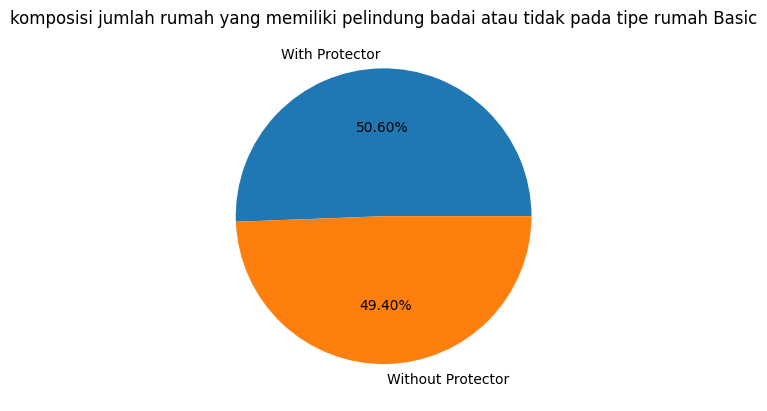

In [6]:
withProtector=basic[basic['hasStormProtector']=='Y'].shape[0]
withoutProtector=basic[basic['hasStormProtector']=='N'].shape[0]

labels=['With Protector','Without Protector']
sizes=[withProtector,withoutProtector]

plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.title('komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic')
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1.terdapat perbedaan pada rata-rata luas loteng rumah tipe basic dan luxury. dimana rata-rata luas loteng rumah tipe basic adalah 5243.0 sedangkan rata-rata luas loteng rumah tipe luxury adalah 5023.0

2.komposisi rumah tipe basic yang memiliki pelindung badai adalah 50.60% sedangkan yang tidak adalah 49.40%.



### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat). Drop feature yang berlaku sebagai unique identifier (CityCode) dan drop feature Price. Lakukan OneHotEncoder untuk data kategorik string. Pisahkan juga label dengan feature!

In [7]:
df_paris.drop('price', axis=1, inplace=True)
df_paris.drop('cityPartRange', axis=1, inplace=True)

In [8]:
#train-test split dan data scaling
from sklearn.model_selection import train_test_split

X = df_paris.drop ('category',axis=1)
y = df_paris['category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=66)

print(X_train.shape)
print(X_test.shape)

df_paris.head(20)

(1400, 9)
(600, 9)


numPrevOwners  made isNewBuilt hasStormProtector  basement  attic  garage  \
0               4  1995          N                 Y      3114   1258     264   
1               1  2011          N                 Y      9390   6219     922   
2               4  2003          Y                 N      2239   2795     951   
3               2  1990          N                 N      6861   5769     442   
4               9  1992          Y                 Y      6618   7045     939   
5               2  2010          Y                 N      4426   5336     911   
6               3  1990          Y                 N      6022   8521     391   
7               3  2000          N                 N      2325   6230     536   
8               2  2020          N                 Y      8598   3119     268   
9               6  1995          N                 Y      2675   6452     724   
10              1  2021          N                 Y      6831   1323     242   
11              1  2002          N                 Y      7704   7896     468   
12              4  1997          Y                 N      3411   8985     213   
13              1  1991          N                 Y       411    475     110   
14              6  2014          Y                 N      2663   1650     403   
15              5  2009          N                 Y      3367   1039     436   
16              2  2019          N                 N      9680   5250     134   
17              1  2014          Y                 N      1820    999     805   
18              5  2000          Y                 N      6453   5671     744   
19              4  1996          Y                 Y      5740   8505     106   

   hasStorageRoom  hasGuestRoom category  
0               Y             9    Basic  
1               N             9    Basic  
2               Y             7    Basic  
3               N             5    Basic  
4               Y            10    Basic  
5               N             4    Basic  
6               Y             3    Basic  
7               N             9    Basic  
8               N            10    Basic  
9               Y             2    Basic  
10              N             9    Basic  
11              Y             8    Basic  
12              N             4    Basic  
13              N             9    Basic  
14              Y            10    Basic  
15              Y             1    Basic  
16              N            10    Basic  
17              Y             4    Basic  
18              Y             9    Basic  
19              Y             6    Basic

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ['isNewBuilt','hasStormProtector','hasStorageRoom']

transformer = make_column_transformer(
    (OneHotEncoder(),cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.fit_transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

onehotencoder__isNewBuilt_N  onehotencoder__isNewBuilt_Y  \
0                          0.0                          1.0   
1                          0.0                          1.0   
2                          0.0                          1.0   
3                          0.0                          1.0   
4                          1.0                          0.0   
5                          0.0                          1.0   
6                          0.0                          1.0   
7                          0.0                          1.0   
8                          0.0                          1.0   
9                          1.0                          0.0   

   onehotencoder__hasStormProtector_N  onehotencoder__hasStormProtector_Y  \
0                                 0.0                                 1.0   
1                                 1.0                                 0.0   
2                                 0.0                                 1.0   
3                                 0.0                                 1.0   
4                                 0.0                                 1.0   
5                                 1.0                                 0.0   
6                                 1.0                                 0.0   
7                                 1.0                                 0.0   
8                                 0.0                                 1.0   
9                                 1.0                                 0.0   

   onehotencoder__hasStorageRoom_N  onehotencoder__hasStorageRoom_Y  \
0                              0.0                              1.0   
1                              0.0                              1.0   
2                              0.0                              1.0   
3                              0.0                              1.0   
4                              0.0                              1.0   
5                              1.0                              0.0   
6                              1.0                              0.0   
7                              0.0                              1.0   
8                              0.0                              1.0   
9                              0.0                              1.0   

   remainder__numPrevOwners  remainder__made  remainder__basement  \
0                       8.0           2013.0               7534.0   
1                       4.0           2010.0               5270.0   
2                       4.0           2007.0               7069.0   
3                       2.0           2011.0               6126.0   
4                       9.0           2016.0               3579.0   
5                       1.0           2008.0               2785.0   
6                       3.0           2014.0               2714.0   
7                       6.0           1991.0                749.0   
8                       6.0           2011.0               6850.0   
9                       1.0           1990.0                292.0   

   remainder__attic  remainder__garage  remainder__hasGuestRoom  
0            6786.0              731.0                     10.0  
1            9562.0              435.0                      9.0  
2            4886.0              473.0                      0.0  
3            7561.0              179.0                      6.0  
4            7867.0              740.0                      6.0  
5            4091.0              472.0                      9.0  
6            4720.0              390.0                      0.0  
7             123.0              279.0                      8.0  
8            5074.0              520.0                     10.0  
9            7462.0              529.0                      9.0

### Train-test split

> Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok

> Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok

### Modelling

Gunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Gunakan Stratified K-fold Cross Validation dengan nilai n_splits=5. Pipeline terdiri atas data scaling, feature selection, dan classifier. Buatlah 2 Pipeline dan 2 GridSearchCV untuk masing-masing kombinasi berikut.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Gunakan dua nilai pada parameter grid yaitu: [None,Scaler]. Untuk sub A: gunakan StandardScaler. Untuk sub B: gunakan MinMaxScaler

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Gunakan dua metode pada parameter grid yaitu: [None,Selector]. Untuk sub A: gunakan SelectKBest dengan ketentuan k minimal 2, maksimal n-1. Untuk sub B: gunakan SelectPercentile dengan ketentuan persentil minimal 30%, maksimal 80%. Kalian juga perlu melakukan setting parameter grid nilai k atau percentile-nya.

>Step classifier untuk membandingkan algoritme classifier. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

> Sub A: RandomForestClassifier(n_estimators=bebas minimal 50, random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas, criterion='entropy') dan LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')

> Sub B: K-Nearest Neighbors(n_neighbors=bebas, weights='distance') dan SVC(C=bebas, gamma=bebas, class_weight='balanced')

>Tampilkan best estimator dan nilai best score dari kedua grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score. Format score 3 digit di belakang koma (.3f).

In [19]:
#cell code ini untuk proses pembuatan model pipeline & grid search 1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import SVC

pipe = [('data scaling', MinMaxScaler()),
            ('feat select',SelectPercentile(percentile=30)),
              ('clf', SVC())]

estimators = Pipeline(pipe)
estimators.fit(X_train_enc, y_train)
test_score = estimators.score(X_test_enc, y_test)
print("Test score: {:.3f}".format(test_score))



Test score: 0.775


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

params_grid = {
    'feat select': [SelectPercentile(percentile=30)],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10, 100],
    'clf__class_weight': ['balanced']
}

skf = StratifiedKFold(n_splits=5)
GSCV1 = GridSearchCV(estimators,param_grid=params_grid,cv=skf)

GSCV1.fit(X_train_enc,y_train)
GStest_score=GSCV1.score(X_test_enc,y_test)

best_estimator = GSCV1.best_estimator_
best_score = GSCV1.best_score_

print("Best Estimator: {:.3f}".format(GStest_score))
print("Best params:",GSCV1.best_params_)
print("Best Score: {:.3f}".format(best_score))
print("\n")


Best Estimator: 0.775
Best params: {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'clf__gamma': 0.1, 'feat select': SelectPercentile(percentile=30)}
Best Score: 0.788




In [21]:
#cell code ini untuk proses pembuatan model pipeline & grid search 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = [('data scaling', MinMaxScaler()),
            ('feat select',SelectPercentile(percentile=30)),
              ('clf', KNeighborsClassifier())]

estimators = Pipeline(pipe)
estimators.fit(X_train_enc, y_train)
test_score = estimators.score(X_test_enc, y_test)
print("Test score: {:.3f}".format(test_score))

Test score: 0.743


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

params_grid = {
    'feat select': [SelectPercentile(percentile=30)],
    'clf__n_neighbors': [3, 5],
    'clf__weights': ['distance']
}

skf = StratifiedKFold(n_splits=5)
GSCV2 = GridSearchCV(estimators,param_grid=params_grid,cv=skf)

GSCV2.fit(X_train_enc,y_train)
GStest_score=GSCV2.score(X_test_enc,y_test)

best_estimator = GSCV2.best_estimator_
best_score = GSCV2.best_score_

print("Best Estimator: {:.3f}".format(GStest_score))
print("Best params:",GSCV2.best_params_)
print("Best Score: {:.3f}".format(best_score))
print("\n")

Best Estimator: 0.730
Best params: {'clf__n_neighbors': 5, 'clf__weights': 'distance', 'feat select': SelectPercentile(percentile=30)}
Best Score: 0.719




### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Tampilkan classification report dan AUC dari best estimator yang diperoleh masing-masing grid search!

In [23]:
#lakukan proses evaluasi model algoritme pembelajaran mesin
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

gs_pred=GSCV1.predict(X_test_enc)

print("Confusion matrix:\n",confusion_matrix(y_test,gs_pred))
print(classification_report(y_test,gs_pred,target_names=['0','1']))

Confusion matrix:
 [[187 135]
 [  0 278]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       322
           1       0.67      1.00      0.80       278

    accuracy                           0.78       600
   macro avg       0.84      0.79      0.77       600
weighted avg       0.85      0.78      0.77       600



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

gs_pred=GSCV2.predict(X_test_enc)

print("Confusion matrix:\n",confusion_matrix(y_test,gs_pred))
print(classification_report(y_test,gs_pred,target_names=['0','1']))

Confusion matrix:
 [[214 108]
 [ 54 224]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       322
           1       0.67      0.81      0.73       278

    accuracy                           0.73       600
   macro avg       0.74      0.74      0.73       600
weighted avg       0.74      0.73      0.73       600



In [16]:
mask = GSCV1.best_estimator_.named_steps['feat select'].get_support()
selected_feat = df_train_enc.columns[mask]
print("selected features GSCV1: ",selected_feat)

selected features GSCV1:  Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y'], dtype='object')


In [17]:
mask = GSCV2.best_estimator_.named_steps['feat select'].get_support()
selected_feat = df_train_enc.columns[mask]
print("selected features GSCV2: ",selected_feat)

selected features GSCV2:  Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y'], dtype='object')


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apa saja feature-feature yang penting untuk membedakan antara rumah basic dan luxury?
    : Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y']

2. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

    : Berdasarkan hasil pengujian menggunakan 2 parameter yang berbeda, dapat disimpulkan bahwa model grid search memiliki tingkat keakuratan yang lebih signifikan dibandingkan dengan pipeline, terkait parameter yang optimal dari grid search adalah dengan menggunakan SVC, dikarenakan dari hasil pengujian 2 parameter, parameter SVC lah yang lebih optimal dikarenakan value yang dihasilkan lebih tinggi daripada parameter KNN.


*tulis jawaban Anda di cell ini*